# DLVC WS 2017

Tutorial 6: CIFAR Classification (Autoencoders)
==

Load Packages
==

In [1]:
%matplotlib inline
import torch
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import copy

Load Data:
===============

In [2]:
transform = transforms.Compose([transforms.ToTensor()])
BatchSize = 100

trainset = torchvision.datasets.CIFAR10(root='./CIFAR10', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BatchSize,
                                          shuffle=True, num_workers=4) # Creating dataloader

testset = torchvision.datasets.CIFAR10(root='./CIFAR10', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=BatchSize,
                                         shuffle=False, num_workers=4) # Creating dataloader

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [3]:
# Check availability of GPU
use_gpu = torch.cuda.is_available()
if use_gpu:
    print('GPU is available!')

Define the Autoencoder:
===============

In [4]:
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(3*32*32, 900),
            nn.ReLU(),
            nn.Linear(900, 256),
            nn.ReLU())
        self.decoder = nn.Sequential(
            nn.Linear(256, 900),
            nn.ReLU(),
            nn.Linear(900, 3*32*32),
            nn.ReLU())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


net = autoencoder()
print(net)

if use_gpu:
    net = net.double().cuda()
else:
    net = net.double()
        
init_weights = copy.deepcopy(net.encoder[0].weight.data)

autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=3072, out_features=900)
    (1): ReLU()
    (2): Linear(in_features=900, out_features=256)
    (3): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=256, out_features=900)
    (1): ReLU()
    (2): Linear(in_features=900, out_features=3072)
    (3): ReLU()
  )
)


Train Autoencoder:
===========

In [5]:
# functions to show an image
def imshow(img, strlabel):
    npimg = img.numpy()
    npimg = np.abs(npimg)
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 10
    fig_size[1] = 10
    plt.rcParams["figure.figsize"] = fig_size
    plt.figure()
    plt.title(strlabel)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [6]:
iterations = 20
learning_rate = 0.9
criterion = nn.MSELoss()

dataiter = iter(testloader)
images, labels = dataiter.next()
printImg = torch.Tensor(iterations/10,2,3,32,32)

for epoch in range(iterations):  # loop over the dataset multiple times
    runningLoss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        # wrap them in Variable
        if use_gpu:
            inputs = Variable(inputs.view(-1, 3*32*32).double()).cuda()
        else:
            inputs = Variable(inputs.view(-1, 3*32*32).double())

        net.zero_grad()  # zeroes the gradient buffers of all parameters
        outputs = net(inputs) # forward 
        loss = criterion(outputs, inputs) # calculate loss
        loss.backward() #  backpropagate the loss
        for f in net.parameters():
            f.data.sub_(f.grad.data * learning_rate) # weight = weight - learning_rate * gradient (Update Weights)
        runningLoss += loss.data[0]
        
    print('At Iteration : %d / %d  ;  Mean-Squared Error : %f'%(epoch + 1,iterations,
                                                                        runningLoss/(60000/BatchSize)))
    if epoch%10 == 0:
        if use_gpu:
            outImg = net(Variable((images[0].view(-1,3*32*32).double().cuda()))).data
            outImg = outImg.view(3,32,32).cpu()
        else:
            outImg = net(Variable((images[0].view(-1,3*32*32).double()))).data
            outImg = outImg.view(3,32,32).cpu()

        dispImg = torch.Tensor(2,3,32,32)
        dispImg[0] = images[0]
        dispImg[1] = outImg
        printImg[epoch/10] = dispImg
print('Finished Training')

At Iteration : 1 / 20  ;  Mean-Squared Error : 0.114138
At Iteration : 2 / 20  ;  Mean-Squared Error : 0.089294
At Iteration : 3 / 20  ;  Mean-Squared Error : 0.076729
At Iteration : 4 / 20  ;  Mean-Squared Error : 0.067853
At Iteration : 5 / 20  ;  Mean-Squared Error : 0.060621
At Iteration : 6 / 20  ;  Mean-Squared Error : 0.055014
At Iteration : 7 / 20  ;  Mean-Squared Error : 0.051379
At Iteration : 8 / 20  ;  Mean-Squared Error : 0.048753
At Iteration : 9 / 20  ;  Mean-Squared Error : 0.046921
At Iteration : 10 / 20  ;  Mean-Squared Error : 0.044799
At Iteration : 11 / 20  ;  Mean-Squared Error : 0.043030
At Iteration : 12 / 20  ;  Mean-Squared Error : 0.041544
At Iteration : 13 / 20  ;  Mean-Squared Error : 0.039984
At Iteration : 14 / 20  ;  Mean-Squared Error : 0.038904
At Iteration : 15 / 20  ;  Mean-Squared Error : 0.037405
At Iteration : 16 / 20  ;  Mean-Squared Error : 0.036328
At Iteration : 17 / 20  ;  Mean-Squared Error : 0.035595
At Iteration : 18 / 20  ;  Mean-Squared 

Process Process-3:
Process Process-1:
Process Process-2:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/iteradmin/anaconda2/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
Process Process-4:
  File "/home/iteradmin/anaconda2/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
    self.run()
Traceback (most recent call last):
    self.run()
Traceback (most recent call last):
  File "/home/iteradmin/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
    self.run()
  File "/home/iteradmin/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/home/iteradmin/anaconda2/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
  File "/home/iteradmin/anaconda2/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
    self._target(*self._args, **self._kwargs)
  File "/home/iteradmin/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
    sel

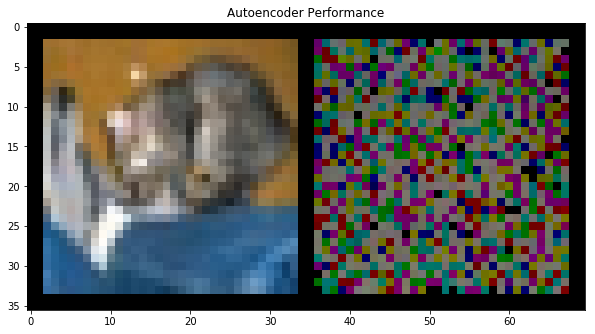

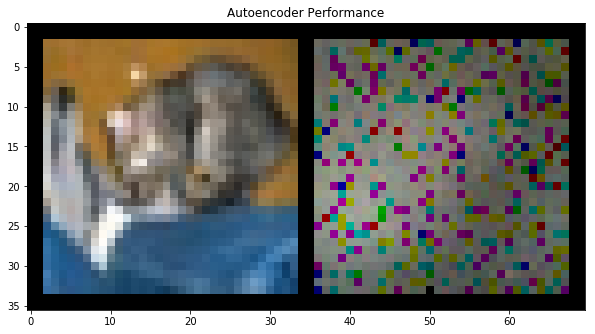

In [7]:
for i in range(iterations/10):
    imshow(torchvision.utils.make_grid(printImg[i]), 'Autoencoder Performance')

Encoder Weights Visualization:
=======================

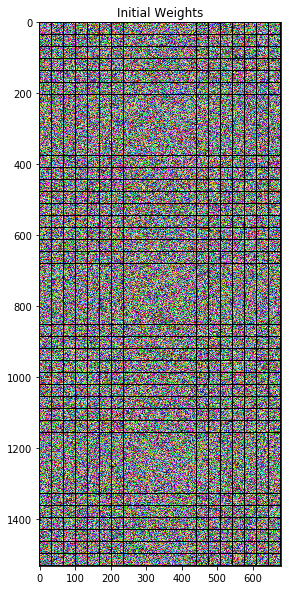

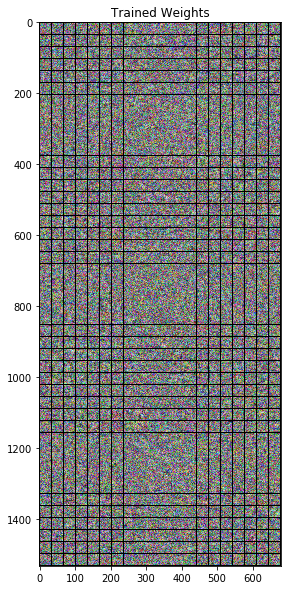

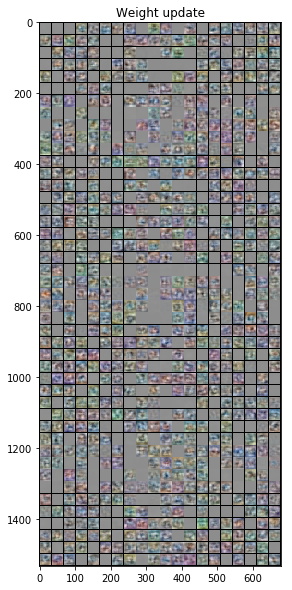

In [8]:
trained_weights = copy.deepcopy(net.encoder[0].weight.data)
d_weights = init_weights - trained_weights 

if use_gpu:
    init_weights = init_weights.view(900,3,32,32).cpu()
    trained_weights = trained_weights.view(900,3,32,32).cpu()
    d_weights = d_weights.view(900,3,32,32).cpu()
else:
    init_weights = init_weights.view(900,3,32,32)
    trained_weights = trained_weights.view(900,3,32,32)
    d_weights = d_weights.view(900,3,32,32)

imshow(torchvision.utils.make_grid(init_weights,nrow=30,normalize=True),'Initial Weights')
imshow(torchvision.utils.make_grid(trained_weights,nrow=30,normalize=True),'Trained Weights')
imshow(torchvision.utils.make_grid(d_weights,nrow=30,normalize=True), 'Weight update')

Modifying the autoencoder for classification: 
================================

In [9]:
# Removing the decoder module from the autoencoder
new_classifier = nn.Sequential(*list(net.children())[:-1])
net = new_classifier
# Adding linear layer for 10-class classification problem
net.add_module('classifier', nn.Sequential(nn.Linear(256, 10),nn.LogSoftmax()))
print(net)
if use_gpu:
    net = net.double().cuda()
else:
    net = net.double()
# Copying initial weights  for visualization
cll_weights = copy.deepcopy(net[0][0].weight.data)
init_classifier_weights = copy.deepcopy(net.classifier[0].weight.data)

Sequential(
  (0): Sequential(
    (0): Linear(in_features=3072, out_features=900)
    (1): ReLU()
    (2): Linear(in_features=900, out_features=256)
    (3): ReLU()
  )
  (classifier): Sequential(
    (0): Linear(in_features=256, out_features=10)
    (1): LogSoftmax()
  )
)


Train Classifier:
===========

In [10]:
iterations = 10
learning_rate = 0.1
criterion = nn.CrossEntropyLoss()

for epoch in range(iterations):  # loop over the dataset multiple times

    runningLoss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        
        # wrap them in Variable
        if use_gpu:
            inputs, labels = Variable(inputs.view(-1, 3*32*32).double()).cuda(), Variable(labels).cuda()
        else:
            inputs, labels = Variable(inputs.view(-1, 3*32*32).double()), Variable(labels)

        net.zero_grad()  # zeroes the gradient buffers of all parameters
        outputs = net(inputs) # forward 
        loss = criterion(outputs, labels) # calculate loss
        loss.backward() #  backpropagate the loss
        for f in net.parameters():
            f.data.sub_(f.grad.data * learning_rate) # weight = weight - learning_rate * gradient (Update Weights)
        runningLoss += loss.data[0]
        correct = 0
        total = 0
    for data in testloader:
        inputs, labels = data
        if use_gpu:
            inputs, labels = Variable(inputs.view(-1, 3*32*32).double()).cuda(), labels.cuda()
        else:
            inputs, labels = Variable(inputs.view(-1, 3*32*32).double()), labels
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()
    print('At Iteration : %d / %d  ;  Train Error : %f ;Test Accuracy : %f'%(epoch + 1,iterations,
                                                                        runningLoss/(60000/BatchSize),100 * correct /float(total)))
print('Finished Training')

/home/iteradmin/anaconda2/lib/python2.7/site-packages/torch/nn/modules/container.py:67: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


At Iteration : 1 / 10  ;  Train Error : 1.586222 ;Test Accuracy : 39.800000
At Iteration : 2 / 10  ;  Train Error : 1.413948 ;Test Accuracy : 41.230000
At Iteration : 3 / 10  ;  Train Error : 1.334198 ;Test Accuracy : 41.380000
At Iteration : 4 / 10  ;  Train Error : 1.283449 ;Test Accuracy : 46.820000


Process Process-119:
Process Process-117:
Process Process-118:
Process Process-120:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/iteradmin/anaconda2/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
Traceback (most recent call last):
  File "/home/iteradmin/anaconda2/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
    self.run()
Traceback (most recent call last):
    self.run()
  File "/home/iteradmin/anaconda2/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
  File "/home/iteradmin/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/home/iteradmin/anaconda2/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
  File "/home/iteradmin/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
    self.run()
  File "/home/iteradmin/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)

KeyboardInterrupt: 

Encoder Weights Visualization:
=======================

In [ ]:
cll_weights_ft = copy.deepcopy(net[0][0].weight.data)
d_weights = cll_weights-cll_weights_ft 

if use_gpu:
    cll_weights = cll_weights.view(900,3,32,32).cpu()
    cll_weights_ft = cll_weights_ft.view(900,3,32,32).cpu()
    d_weights = d_weights.view(900,3,32,32).cpu()
else:
    cll_weights = cll_weights.view(900,3,32,32)
    cll_weights_ft = cll_weights_ft.view(900,3,32,32)
    d_weights = d_weights.view(900,3,32,32)

imshow(torchvision.utils.make_grid(cll_weights,nrow=30,normalize=True),'Trained Weights')
imshow(torchvision.utils.make_grid(cll_weights_ft,nrow=30,normalize=True),'Finetuned Weights')
imshow(torchvision.utils.make_grid(d_weights,nrow=30,normalize=True), 'Weight update')

Performance of different Classes:
==================

In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    if use_gpu:
        outputs = net(Variable(images.view(-1, 3*32*32).double().cuda()))
        _, predicted = torch.max(outputs.data.cpu(), 1)
    else:
        outputs = net(Variable(images.view(-1, 3*32*32).double()))
        _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %f %%' % (
        classes[i], 100 * class_correct[i] / float(class_total[i])))